# Analyzing Beauty Products at Sephora


#### This is the notebook I will be using for my final project in my Information and Data Science course the Fall 2025 semester. It contains the code, as well as the written report. 

Link to dataset: https://www.kaggle.com/datasets/nadyinky/sephora-products-and-skincare-reviews?select=product_info.csv

### Step 2: Perform data preparation and cleaning

##### Step 2.1 Load dataset

In [1]:
# Here I'll be uploading the libaries I'll need 
import pandas as pd
import ast
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Here is where I'll upload the dataset (which is a .csv file) into a dataframe using the pandas library
df = pd.read_csv('product_info.csv')
df.head()

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0


#### Dictionary for columns/features: <br>
**product_id** - The unique identifier for the product from the site <br>
**product_name** - The full name of the product <br>
**brand_id** - The unique identifier for the product brand from the site <br>
**brand_name** - The full name of the product brand <br>
**loves_count** - The number of people who have marked this product as a favorite <br>
**rating** - The average rating of the product based on user reviews <br>
**reviews** - The number of user reviews for the product <br>
**size** - The size of the product, which may be in oz, ml, g, packs, or other units depending on the product type <br>
**variation_type** - The type of variation parameter for the product (e.g. Size, Color) <br>
**variation_value** - The specific value of the variation parameter for the product (e.g. 100 mL, Golden Sand) <br>
**variation_desc** - A description of the variation parameter for the product (e.g. tone for fairest skin) <br>
**ingredients**	- A list of ingredients included in the product, for example: [‘Product variation 1:’, ‘Water, Glycerin’, ‘Product variation 2:’, ‘Talc, Mica’] or if no variations [‘Water, Glycerin’] <br>
**price_usd** - The price of the product in US dollars <br>
**value_price_usd** - The potential cost savings of the product, presented on the site next to the regular price <br>
**sale_price_usd** - The sale price of the product in US dollars <br>
limited_edition - Indicates whether the product is a limited edition or not (1-true, 0-false) <br>
**new** - Indicates whether the product is new or not (1-true, 0-false) <br>
**online_only**	- Indicates whether the product is only sold online or not (1-true, 0-false) <br>
**out_of_stock** - Indicates whether the product is currently out of stock or not (1 if true, 0 if false) <br>
**sephora_exclusive** - Indicates whether the product is exclusive to Sephora or not (1 if true, 0 if false) <br>
**highlights** - A list of tags or features that highlight the product's attributes (e.g. [‘Vegan’, ‘Matte Finish’]) <br>
**primary_category** - First category in the breadcrumb section <br>
**secondary_category** - Second category in the breadcrumb section <br>
**tertiary_category** - Third category in the breadcrumb section <br>
**child_count**	- The number of variations of the product available (e.g. different lipstick shades, foundation shades) <br>
**child_max_price** - The highest price among the variations of the product <br>
**child_min_price** - The lowest price among the variations of the product <br>

##### Step 2.2: Explore basic info about the data

In [3]:
# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8494 entries, 0 to 8493
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          8494 non-null   object 
 1   product_name        8494 non-null   object 
 2   brand_id            8494 non-null   int64  
 3   brand_name          8494 non-null   object 
 4   loves_count         8494 non-null   int64  
 5   rating              8216 non-null   float64
 6   reviews             8216 non-null   float64
 7   size                6863 non-null   object 
 8   variation_type      7050 non-null   object 
 9   variation_value     6896 non-null   object 
 10  variation_desc      1250 non-null   object 
 11  ingredients         7549 non-null   object 
 12  price_usd           8494 non-null   float64
 13  value_price_usd     451 non-null    float64
 14  sale_price_usd      270 non-null    float64
 15  limited_edition     8494 non-null   int64  
 16  new   

**Columns of type object:** product_id, product_name, brand_name, size, variation_type, variation_value, variation_desc, ingredients, highlights, primary_category, secondary_category, tertiary_category
<br>

**Columns of type integer:** brand_id, loves_count, limited_edition, new, online_only, out_of_stock, sephora_exclusive, child_count
<br>

**Columns of type float:** rating, reviews, price_usd, value_price_usd, sale_price_usd, child_max_price, child_min_price

In [4]:
# Summary of statistics for numeric columns
df.describe(include = 'all')

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
count,8494,8494,8494.000000,8494,8.494000e+03,8216.000000,8216.000000,6863,7050,6896,...,8494.000000,8494.000000,8494.000000,6287,8494,8486,7504,8494.000000,2754.000000,2754.000000
unique,8494,8415,NaN,304,NaN,NaN,NaN,2055,7,2729,...,NaN,NaN,NaN,4417,9,41,118,NaN,NaN,NaN
top,P473671,Fragrance Discovery Set,NaN,SEPHORA COLLECTION,NaN,NaN,NaN,1.7 oz/ 50 mL,Size,1.7 oz/ 50 mL,...,NaN,NaN,NaN,"['Layerable Scent', 'Floral Scent']",Skincare,Women,Perfume,NaN,NaN,NaN
freq,1,3,NaN,352,NaN,NaN,NaN,500,4043,374,...,NaN,NaN,NaN,64,2420,875,568,NaN,NaN,NaN
mean,NaN,NaN,5422.440546,NaN,2.917957e+04,4.194513,448.545521,NaN,NaN,NaN,...,0.219096,0.073699,0.279374,NaN,NaN,NaN,NaN,1.631622,53.792023,39.665802
std,NaN,NaN,1709.595957,NaN,6.609212e+04,0.516694,1101.982529,NaN,NaN,NaN,...,0.413658,0.261296,0.448718,NaN,NaN,NaN,NaN,5.379470,58.765894,38.685720
min,NaN,NaN,1063.000000,NaN,0.000000e+00,1.000000,1.000000,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,3.000000,3.000000
25%,NaN,NaN,5333.000000,NaN,3.758000e+03,3.981725,26.000000,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,22.000000,19.000000
50%,NaN,NaN,6157.500000,NaN,9.880000e+03,4.289350,122.000000,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,32.000000,28.000000
75%,NaN,NaN,6328.000000,NaN,2.684125e+04,4.530525,418.000000,NaN,NaN,NaN,...,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,1.000000,59.000000,42.000000


##### Checking for outliers

**mean vs. max (rounded)**
- brand_id -> <br> mean: 5422, max: 8020
- love_count -> <br> mean: 29,180, max: 1,401,068 <br> **BIG SKEW: most likley due to super popular products.**
- rating -> <br> mean: 4.2, max: 5
- reviews -> <br> mean: 448.5, max: 21,381 <br> **Big skew here as well due to popularity of certain products.**
- online_only -> <br> mean: 0.22, max: 1
- out_of_stock -> <br> mean: 0.07, max: 1
- sephora_exclusive -> <br> mean: 0.28, max: 1
- child_count -> <br> mean: 1.6, max: 105
- child_max_price -> <br> min: 3, mean: 53.8, max: 570
- child_min_price -> <br> min:3, mean: 39.7, max: 400 <br>**Big skew for both child_max_price & child_min_price due to cheap product's vs. luxury product's prices**

**Some numeric fields contain extreme values, but they are just products that represent genuinely popular products rather than data errors. Price values also fall within expected ranges for beauty products at Sephora. Therefore, no outlier removal was performed.**

In [5]:
# Check for missing values in data
df.isna().sum()

product_id               0
product_name             0
brand_id                 0
brand_name               0
loves_count              0
rating                 278
reviews                278
size                  1631
variation_type        1444
variation_value       1598
variation_desc        7244
ingredients            945
price_usd                0
value_price_usd       8043
sale_price_usd        8224
limited_edition          0
new                      0
online_only              0
out_of_stock             0
sephora_exclusive        0
highlights            2207
primary_category         0
secondary_category       8
tertiary_category      990
child_count              0
child_max_price       5740
child_min_price       5740
dtype: int64

**Columns with missing values + possible reason:** 14
- rating (278) -> Users could have decided to skip rating the product, will leave as NaN since ratings should not be faked. 
- reviews (278) -> Users could have decided to skip reviewing the product, will leave as NaN to not fake a review. I was also thinking of dropping this column, but then realized that I need it to see which products are highly rated AND highly reviewed (ex: a product with a perfect 5.0 rating but only 2 reviews vs one with 4.7 rating but with 3,500 reviews).

**There's 278 rows where both rating and reviews are missing. These products most likely won't be used to answer questions about quality, popularity, or value. Therefore, I won't remove these columns but instead I'll drop the rows that have these missing values.**

- size (1631) -> **Size of product not listed, replace with "unknown".**
- variation_type (1444) -> **Many products missing variation_type. I was going to drop this column but may use it when comparing variations in my analysis, so instead I'll replace missing cells with "None"**
- variation_value (1598) -> **Many products missing variation_value and a lot of these values are already in the size column, but it also contains non-size variation information like shade names, color descriptions, or specific material/type. Therfore, instead of dropping the column, I'll just replace the missing values with "None".**
- variation_desc (7244) -> **Many products missing variation_desc and it's mostly descriptive text. I don't plan on using this column in my analysis so I'll drop this column.**
- ingredients (945) -> **First, the content in "ingredients" column seems to be a list but they are in the format of a string. One of the analysis I might do is compare the ingredients in the products, so I'll probably change the content to lists. There's also missing values for some products due to Sephora not listing them or the scraper not capturing them. Therefore, when filling the missing values in step 2.3 I'll fill these with an empty list.**
- value_price_usd (8043) -> **Way too many missing cells. It seems too sparse for comparative analysis, so I'm going to drop this column.**
- sale_price_usd (8224) ->  **Filled cells only appear when a product is on sale. I wanted to keep this column, but I feel like it's way to sparse for price comparisions in my analysis. Therefore, I'll be dropping the column.**
- highlights (2207) -> **Many products with no highlight listed, possibly due to Sephora not listing them for that product, or because they simply don't have any highlight tags. The values in this column also appear to be lists in the form of strings, so like in the ingredients column, I'll fill the missing values with an empty list since I plan on changing the string to lists. I also thought of dropping this column, but I need it incase I decide to analyze the claims of the product vs. how it actually performs.**
- secondary_category (8) -> **Not many missing values, but can stil replace with "Unknown".**
- tertiary_category (990) -> **Some missing values here, will replace with "unknown" since I may use this column later. I could drop this column, but I may also use it when making comparisons.**

- child_max_price (5740) -> Will leave as NaN unless I later decide to analyze different variations of products (e.g. is this shade of a product more expensive than this other shade?).
- child_min_price (5740) -> Will stay as NaN like child_max_price as I may use it for analysis later on if I decide to compare different variations of a product.

In [6]:
# Wanted a more randomized sample of the content within the data instead of the first 5 rows
df.sample(5)

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
6909,P469217,Yūbi Blonde Nourishing Conditioner for Blonde ...,5338,shu uemura,1661,4.5662,136.0,8 oz/ 250 mL,Size,8 oz/ 250 mL,...,0,0,1,"['Good for: Color Care', 'All Hair Types', 'Go...",Hair,Shampoo & Conditioner,Conditioner,0,NaN,NaN
3243,P430240,Veil Translucent Setting Powder - Talc Free,5879,Hourglass,122040,4.5108,1901.0,Standard Size Translucent - .36 oz / 10.5 g,Size,Standard Size Translucent - .36 oz / 10.5 g,...,0,0,0,"['Loose Powder Formula', 'Natural Finish', 'Co...",Makeup,Face,Setting Spray & Powder,1,24.0,24.0
6655,P502417,Wishing You 12 Pan Eyeshadow Palette,3902,SEPHORA COLLECTION,8330,4.5000,20.0,NaN,NaN,NaN,...,0,1,1,"['Pressed Powder Formula', 'Shimmer Finish', '...",Makeup,Eye,Eye Palettes,0,NaN,NaN
1457,P122694,Line Smoothing Concealer,1254,CLINIQUE,16986,4.0591,711.0,0.31 oz/ 9 mL,Color,Light,...,0,1,0,NaN,Makeup,Face,Concealer,1,26.0,26.0
4823,P504040,Spirulina + Ashwagandha Volcanic Sea Clay Deto...,6749,MARA,1713,4.8519,27.0,1.69 oz / 50 mL,Size,1.69 oz / 50 mL,...,0,0,0,"['Good for: Pores', 'Plumping', 'Hydrating', '...",Skincare,Masks,Face Masks,0,NaN,NaN


#### Summary of basic info:
- **How many rows & columns present?** 8494 rows x 27 columns
- **Data types columns:** 7 are of type float64, 8 are of type int64, and 12 are of type object. The columns with their data types are listed in the output after running df.info().

- **Missing values?**  Yes, 14 columns have missing values listed in the output of df.isna().sum().

- **Any outliers?** Some that stand out are:<Br>
"loves_count": (mean around 29,180, max around 1,401,068) -> some products are really popular and Sephora is a big store, so it makes sense.
<br>"reviews": (mean around 448, max around 21,281) -> this is also because popular products have lots of reviews
<br>"child_max_price": 3-570 and "child_min_price": 3-400 -> at first I thought this could be an error, but high end luxury products such as fragances can be costly.
<br><br> **These values seem extreme, but they are most likely due to popularity differences within products.**

**For columns with missing values but that may be helpful for analysis later, I'll be replacing the missing values such as:**
- size -> "unknown"
- variation_type -> "None"
- variation_value -> "None"
- ingredients -> with an empty list 
- highlights -> with an empty list
- secondary_category -> "Unknown"
- tertiary_category -> "Unknown"

**Columns with missing values I will be dropping:**
- variation_desc
- value_price_usd
- sale_price_usd

**Will also be dropping 278 rows where both rating and reviews are missing**

**The rest of the columns I will keep. I was thinking of dropping columns that had no missing cells like "new" or "online_only", but I can use them to answer questions like "Is the price_usd of new products higher or lower than the overall market average? or "Do online-only products tend to be cheaper than in store products?**

##### 2.3 Handle missing, incorrect and invalid data

In [7]:
# Dropping duplicate rows just in case:
df = df.drop_duplicates()
df.shape

(8494, 27)

No duplicates present as the shape of the dataframe remains the same after running ^

**Now going to drop columns with missing values:**

In [8]:
df = df.drop(['variation_desc', 'value_price_usd', 'sale_price_usd'], axis = 1)

**Dropping the 278 rows where both rating and reviews are missing**

In [9]:
df = df.dropna(subset = ['rating', 'reviews'])

In [10]:
# Verifying that the columns dropped:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8216 entries, 0 to 8491
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          8216 non-null   object 
 1   product_name        8216 non-null   object 
 2   brand_id            8216 non-null   int64  
 3   brand_name          8216 non-null   object 
 4   loves_count         8216 non-null   int64  
 5   rating              8216 non-null   float64
 6   reviews             8216 non-null   float64
 7   size                6695 non-null   object 
 8   variation_type      6882 non-null   object 
 9   variation_value     6732 non-null   object 
 10  ingredients         7322 non-null   object 
 11  price_usd           8216 non-null   float64
 12  limited_edition     8216 non-null   int64  
 13  new                 8216 non-null   int64  
 14  online_only         8216 non-null   int64  
 15  out_of_stock        8216 non-null   int64  
 16  sephora_exc

In [11]:
# Going to fill "not provided / not applicable" text fields + missing ingredients & highlights
df['size'] = df['size'].fillna('Unknown')
df['variation_type'] = df['variation_type'].fillna('None')
df['variation_value'] = df['variation_value'].fillna('None')
df['ingredients'] = df['ingredients'].fillna('[]')
df['highlights'] = df['highlights'].fillna('[]')
df['secondary_category'] = df['secondary_category'].fillna('Unknown')
df['tertiary_category'] = df['tertiary_category'].fillna('Unknown')

In [12]:
# Going to convert the values within ingredients and highlights to real lists (right now they are strings)
# Will need to import ast module to use literal_eval

df['ingredients'] = df['ingredients'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith('[') else [])
df['highlights'] = df['highlights'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith('[') else [])

In [13]:
# Double checking to make sure all values within the ingredients and highlights columns are now lists
print(df['ingredients'].apply(lambda x: type(x)).value_counts())
print(df['highlights'].apply(lambda x: type(x)).value_counts())

ingredients
<class 'list'>    8216
Name: count, dtype: int64
highlights
<class 'list'>    8216
Name: count, dtype: int64


##### 2.4 Perform any additional steps (feature engineering)

**New feature: has_ingredients** <br>

**Why create a has_ingredients feature?** <br>
I plan on using the ingredients to answer questions related to ingredient transparency such as:
- "Do products with their ingredients listed have higher reviews?"
- "Do products with information about their ingredients have a higher love count?"
<br>

Almost all products in the ingredients column have ingredients listed, but some were not provided and left empty. Therfore, I want to check whether ingredient information is available using a binary variable. To do this, I can create a new feature called has_ingredients where: 
<br>
- 0 = the product has no ingredient list provided
- 1 = the product has ingredients listed
<br>

I cleaned the ingredients columns earlier to convert all values to Python lists, so now I can determine the presence/absence of ingredient information by checking the length of each list:


In [14]:
df['has_ingredients'] = df['ingredients'].apply(lambda x: 0 if len(x) == 0 else 1)

# going to print a sample of this feature to make sure values are correct
print(df['has_ingredients'].sample(5))

1201    1
7047    1
4940    1
7113    1
6966    1
Name: has_ingredients, dtype: int64


In [15]:
# Checking shape of dataframe to make sure new feature was added
df.shape

(8216, 25)

**Second new feature:  size_ml** <br>

**Why this feature?** <br>
The original size column contains many different formats, such as:
- 3.4oz / mL
- 1.7 oz
- 0.12 g
- 7 x 1.2 g (eyeshadow palettes)
- Dimensions: 2 x 4 x 3
- mL-only values like 50 mL

These formats are inconsistent and make it difficult to compare product sizes directly. To make meaningful price comparisons, I created a new feature called size_ml that extracts the milliliter (mL) amount when possible. 

This feature does not convert every size, but it successfully converts cases where mL is explicitly listed in the text. The products that don't include mL in their size description remain as NaN. 
<br>


Doing this will allow me to: <br>
- Make comparisons based on price per mL, rather than total price
- Check if larger products are cheaper per mL than smaller ones
- Check if sets or bundles actually provide better value per unit than buying items individually

**Important note about this feature's limitations:** <br>
This feature only converts size values that already include mL in their text. Products that list size exclusively in ounces, grams, or non-volume formats cannot be converted without additional assumptions, so they remain as NaN. In the future, I would like to put more effort into converting all items in the size column to mL, but due to the projects deadline approaching, it will have to wait. Also, mL is already the standard unit for many liquid and semi-liquid beatuty products, which are what I plan on focusing my comparisons in. 



In [16]:
# Writing a function to extract the milliliter (mL) values from a product's size string.
# It will return a float if mL is found, otherwise it returns None. 
def extract_ml(size):

    # If the size value is not a string, skip it
    if not isinstance(size, str):
        return None
    
    # Going to use a regular expression to find patterns like "50 mL", "100 mL", "8.5 mL"
    # (\d+\.?\d*) -> this captures numbers like 50, 100, 8.5, 30.0
    # \s* -> allows for optional spaces
    # mL -> specifically looks for "mL" in the text
    match = re.search(r'(\d+\.?\d*)\s*mL', size)

    # If match is found -> convert captured number to a float
    # Using match.group(1) to extract only the number portion and not "mL"
    return float(match.group(1)) if match else None

# Apply extraction function to entire size column to create new feature
df['size_ml'] = df['size'].apply(extract_ml)

In [17]:
print(df['size_ml'].sample(10))

2588     NaN
258      NaN
7344     NaN
1042     NaN
2744    24.9
2508     NaN
6490     NaN
6591     NaN
5807    60.0
3365     NaN
Name: size_ml, dtype: float64


**Third new feature: price_per_ml** <br>

**Why this feature?**<br>
I use beauty products a lot and know that they can vary a lot in both size and price. This can make direct price comparison misleading. For example, sometimes I'll be at Walmart shopping for a certain item. To compare which one will be cheaper per unit, I divide the price of the product by how much it has inside. For example:
- Packet 1 of makeup remover wipes has 50 wipes for $5.25 
- Packet 2 of a different brand has 40 wipes for $3.50
Here, $5.25/50 = $0.105 is the price per wipe in packet 1 <br>
and $3.50/40 = $0.0875 is the price per wipe in packet 2 <br>
Therefore, I would buy packet 2 because it's a cheaper cost per wipe. Looking only at the total price of a product doesn't tell us which product offers better value. 

That's why I want to create a new feature price_per_ml that represents the cost of 1 ml of a product. This standardizes prices across different package sizes and formats, making comparisons easier and more meaningful. 

Some questions I could possibly answer are:
- Is this brand overpriced per mL compared to this other brand?
- What's the difference in price per mL between different categories (e.g. serums, fragances, cleansers, etc.)?
- Is this product that's on sale truly cheaper per mL than similar regular-priced products?
- How does the price per mL of one brand's foundation compare to another brand's foundation?

In [18]:
# Creating a function to compute the price per mL for a product, per row
# Will return none if size_ml is missing or zero
def compute_price_per_ml(row):
    size = row['size_ml']
    price = row['price_usd']

    # If size is missing(NaN) or zero, we can't compute a meaningful price per mL
    if pd.isna(size) or size == 0:
        return None
    
    # Otherwise, divide price by size in mL
    return price / size

# Apply function row-wise to create the new feature
# axis = 1 is for it to go row-by-row
df['price_per_ml'] = df.apply(compute_price_per_ml, axis = 1)

In [19]:
# Quick sanity check
df[['product_name', 'price_usd', 'size', 'size_ml', 'price_per_ml']].sample(5)

,product_name,price_usd,size,size_ml,price_per_ml
2828,Helios 1875W Advanced Professional Hair Dryer,279.0,Unknown,NaN,NaN
5410,Balinese Coconut Perfume Oil Rollerball,35.0,0.27 oz / 6 mL Perfume Oil Rollerball,6.0,5.833333
5167,Mini Alien Perfume Gift Set,30.0,Unknown,NaN,NaN
579,BADgal BANG! 24-Hour Waterproof Eyeliner,22.0,0.009 oz/ 0.25 g,NaN,NaN
4377,Teint Idole Ultra Wear Care & Glow Foundation​...,57.0,1 oz / 30 mL,30.0,1.900000


In [20]:
df.shape

(8216, 27)

#### After cleaning the data: 
- Dropped 3 columns
- Dropped 278 rows (ratings and reviews)
Total: 8216 rows x 24 columns
#### After doing some featuring engineering:
- Added 3 new features/columns 

**Final number of rows and columns:** <br>
**Rows: 8216** <br>
**Columns: 27** <br>

### Step 3: Perform exploratory analysis and visualization

##### Step 3.1 Compute statistics for numeric columns

In [21]:
# Going to use .describe() to get summary statistics for all numeric columns
df_stats = df.describe()

# Output the statistics
print("Summary Statistics for Numeric Columns:")
# At first I only wrote "print(df_stats)" but wanted to format the output better
print(df_stats.to_markdown(numalign = "left", stralign = "left"))

Summary Statistics for Numeric Columns:
|       | brand_id   | loves_count   | rating   | reviews   | price_usd   | limited_edition   | new       | online_only   | out_of_stock   | sephora_exclusive   | child_count   | child_max_price   | child_min_price   | has_ingredients   | size_ml   | price_per_ml   |
|:------|:-----------|:--------------|:---------|:----------|:------------|:------------------|:----------|:--------------|:---------------|:--------------------|:--------------|:------------------|:------------------|:------------------|:----------|:---------------|
| count | 8216       | 8216          | 8216     | 8216      | 8216        | 8216              | 8216      | 8216          | 8216           | 8216                | 8216          | 2724              | 2724              | 8216              | 4846      | 4846           |
| mean  | 5420.58    | 30140.9       | 4.19451  | 448.546   | 51.2282     | 0.0618306         | 0.0591529 | 0.209591      | 0.071446       | 0.281159       

### Insights from summary statistics for numeric columns:
1. There seems to be a high skew in popularity and price of products:
<br>**Columns where this is shown:** loves_count, reviews, and price_usd
- **Mean vs. Median:** 
- The mean for **loves_count** is around 30,141 which is much higher than the median of around 10,444.
- The mean for **reviews** is around 449 which is also much higher than the median of around 122.

- **Extreme Maximums:**
- Both **loves_count** and **reviews** show high maximums. 
- **loves_count** has a maximum of around 1.4 million and **reviews** is over 21,000.
<br><br>**This means that a small number of extremely popular products are most likely skewing this distribution and should be visualized in a histogram.**

2. General quality and value:
- **Rating:** The average **rating** is pretty high at 4.19 (with a median of 4.29), meaning that Sephora's product selection is generally well regarded.
- **Price:** The median **price** is $35, with a meximum **price** of $1,900.
- **Price-per-mL:** The median **price_per_ml** is $1.07, but the max is $131.25. I believe that this confirms that this engineered feature  is essential for identifying highly concentrated or luxury products.

3. Binary Flag Ratios:
- **has_ingredients** (mean: around 0.89) - confirms that around 89% of products disclose their ingredients.
- **sephora_exclusive** (mean: around 0.28) - confirms that around 28% of products are Sephora exclusive.
- **online_only** (mean: around 0.21) - confirms that around 21% of products are online only. 

##### Step 3.2 Explore distribution of numeric columns using histograms etc.

Going to visualize the distribution of the highly skewed columns such as:
- rating (for quality of products)
- loves_count (for popularity of products)
- price_usd (for price of products)
- price_per_ml (for value of products)

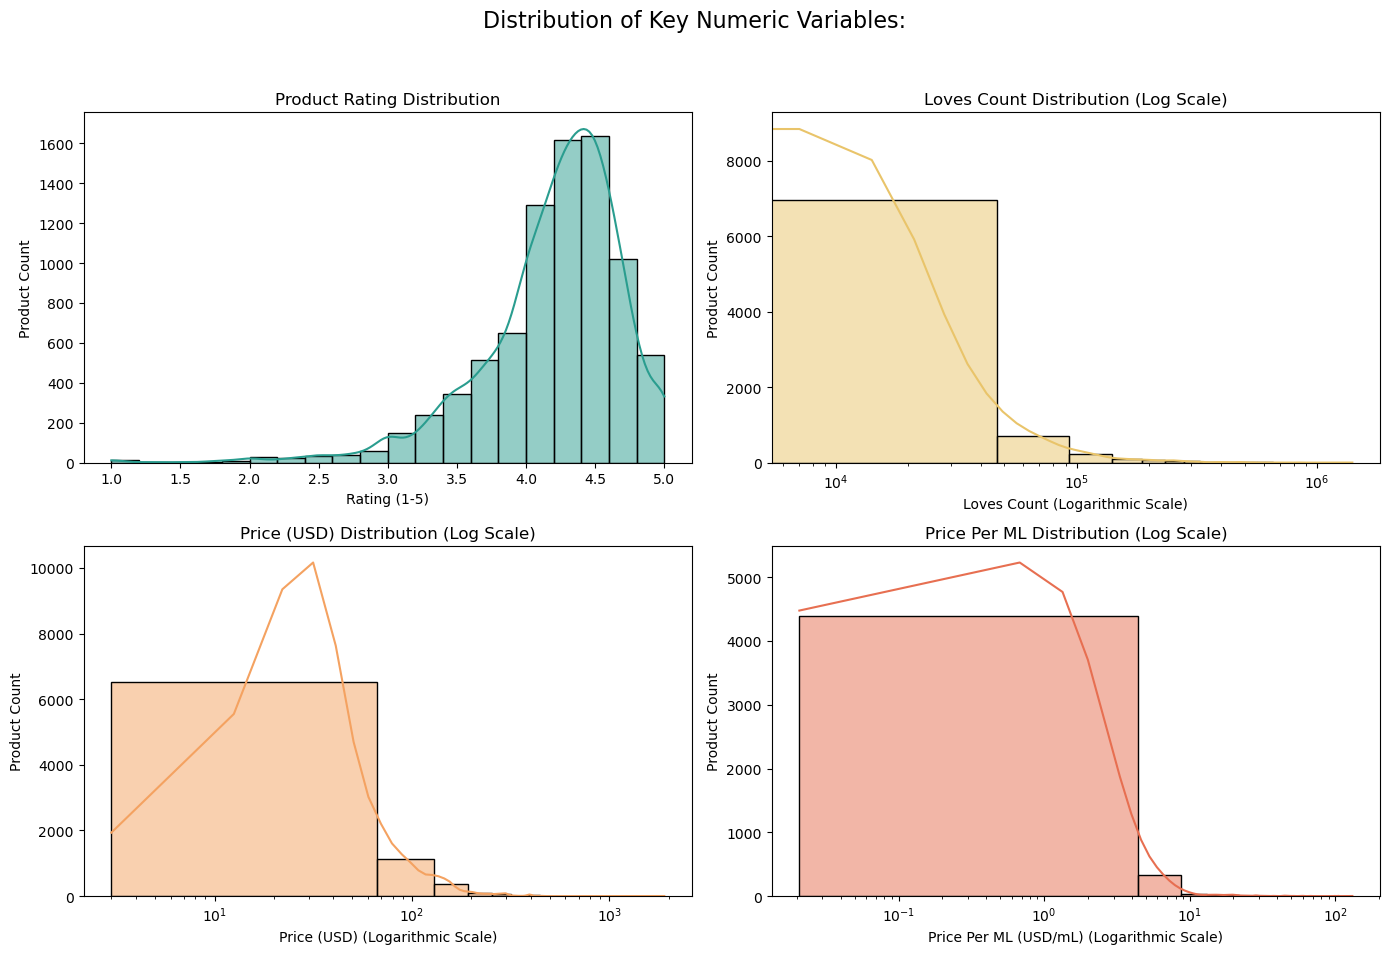

In [22]:
# Want to display all four histograms in one image.
# For this, I'll create a 2x2 figure for the four histograms:
fig, axes = plt.subplots(2, 2, figsize = (14, 10))
fig.suptitle('Distribution of Key Numeric Variables:', fontsize = 16)
ylabel = 'Product Count'

# 1st histogram -> Product Rating (Normal Scale)
sns.histplot(df['rating'], bins = 20, kde = True, ax = axes[0, 0], color = '#2a9d8f')
axes[0, 0].set_title('Product Rating Distribution')
axes[0, 0].set_xlabel('Rating (1-5)')
axes[0, 0].set_ylabel(ylabel)

# 2nd histogram -> Loves Count (Log Scale)
sns.histplot(df['loves_count'], bins = 30, kde = True, ax = axes[0, 1], color = '#e9c46a')
axes[0, 1].set_title('Loves Count Distribution (Log Scale)')
axes[0, 1].set_xlabel('Loves Count (Logarithmic Scale)')
axes[0, 1].set_xscale('log')
axes[0, 1].set_ylabel(ylabel)

# 3rd histogram -> Price USD (Log Scale)
sns.histplot(df[df['price_usd'] > 0]['price_usd'], bins = 30, kde = True, ax = axes[1,0], color = '#f4a261')
axes[1, 0].set_title('Price (USD) Distribution (Log Scale)')
axes[1, 0].set_xlabel('Price (USD) (Logarithmic Scale)')
axes[1, 0].set_xscale('log')
axes[1, 0].set_ylabel(ylabel)

# 4th histogram -> Price Per ML (Log Scale)
sns.histplot(df[df['price_per_ml'].notna()]['price_per_ml'], bins = 30, kde = True, ax = axes[1,1], color = '#e76f51')
axes[1, 1].set_title('Price Per ML Distribution (Log Scale)')
axes[1, 1].set_xlabel('Price Per ML (USD/mL) (Logarithmic Scale)')
axes[1, 1].set_xscale('log')
axes[1, 1].set_ylabel(ylabel)

# Fixing formatting of graphs:
plt.tight_layout(rect = [0, 0.03, 1, 0.95])

1. Product rating (rating):
- **Distribution:** The distribution is heavily **left-skewed**, meaning that most products are highly rated towards 5 stars.
- **Insight:** The majority of products fall between 4.0 and 5.0 stars. This suggests that Sephora's product selection is generally high-quality or that customers tend to review products they enjoy. Products below 3.0 are extremely rare. 

2. Popularity (loves_count):
- **Distribution:** Extremely **right-skewed** (even on a log scale). The count drops dramatically as loves_count increases. 
- **Insight:** Most products (~80%) have a relatively low loves_count (under ~50,000 loves). However, the long tail confirms the existence of a few "superstar" products that have millions of loves (up to 1.4 million). This suggests that popularity is concentrated among a small number of key items.

3. Price (price_usd):
- **Distribution:** Heavily **right-skewed** (even on a log scale). 
- **Insight:** Most products are priced between $20 and $50 (which is the most common range, seen by the central peak). There is a sharp decline after the $100 mark, with very few products priced at the high end (up to $1,900).

4. Value (price_per_ml):
- **Distribution:** This engineered feature is the **most skewed** compared to the others. 
- **Insight:** The majority of products fall into a low-cost, high volume range (around $0.25 - $5.00 per mL). However, the peak at the far right indicates a distinct category of **ultra-concentrated, high-value products** (ex: small bottles of serum, fragance, or luxury creams) that command prices far exceeding the median value.


##### Step 3.3 Explore relationship between various columns

For this step, I'll be using a correlation matrix with relevant numeric columns and the new engineered features. These columns contain the complete set of numeric variables that represent the three dimensions of my project: **Quality/Popularity, Price/Value, and Marketing/Inventory Status**.
<br>


**Columns I'll be including:**

Continuous/Engineered:
- rating
- reviews
- loves_count
- price_usd
- price_per_ml
- size_ml


Binary Flags:
- limited_edition
- new
- sephora_exclusive
- online_only
- has_ingredients
- out_of_stock

 **Correlation matrix:** 
- measures the linear association between every pair of numeric variables using the **Pearson correlation coefficient**. The resulting value always falls between -1.0 and +1.0.  
- only performed on quantitative (numeric) data
- a value close to +1.0 means a strong positive correlation (variables move in the same direction).
- a value close to -1.0 means a strong negative correlation (variables move in opposite directions).
- 0 means no linear correlation.


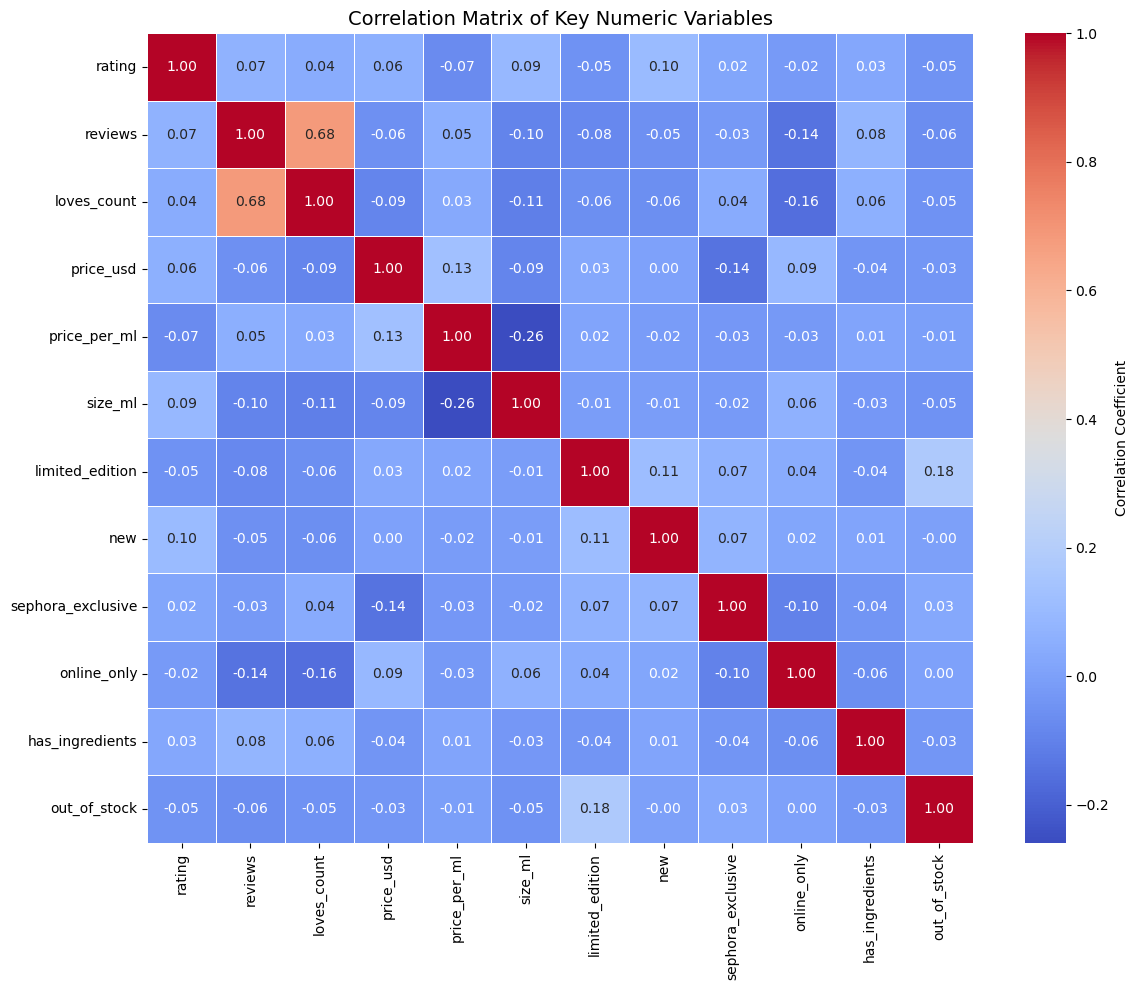

In [23]:
# Creating a dataframe with the numeric columns I plan to use
numeric_df = df[[
    'rating', 'reviews', 'loves_count', 'price_usd', 'price_per_ml', 'size_ml',
    'limited_edition', 'new', 'sephora_exclusive', 'online_only', 'has_ingredients',
    'out_of_stock'
]].copy()

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

# Will visualize the correlation matrix using a heatmap
plt.figure(figsize = (12,10))
sns.heatmap(
    correlation_matrix,
    annot = True,
    cmap = 'coolwarm',
    fmt = ".2f",
    linewidths = .5,
    cbar_kws = {'label': 'Correlation Coefficient'}
)

plt.title('Correlation Matrix of Key Numeric Variables', fontsize = 14)
plt.tight_layout()


##### Step 3.4 Make a note of interesting insights from the exploratory analysis

1. Popularity is Independent of Quality
<br>
- **Observation:** The **rating** has a negligible correlation with both **reviews** (0.07) and **loves_count** (0.04).
- **Insight:** Product success (measured by popularity/volume) is not simply a function of its average star rating. This suggests that market visibility, brand reputation, and marketing are likely the driving factors behind high engagement in products.  

2. Higher Price Tends to Mean Higher Popularity
<br>
- **Observation:** There's a weak negative correlation between the raw **price_usd** and **loves_count** (-0.09)
- **Insight:** The most loved products are slightly more likely to be found in the lower-to-mid price tiers, rather than the most expensive ones. 

3. Price-Value is Complex and Weakly Related
<br>
- **Observation:** The raw **price_usd** has a weak positive correlation with **price_per_ml** (0.13).
- **Insight:** This confirms that the absolute price of a product does not strongly reflect its unit value (cost per mL). A high-priced item may be expensive simply because it's a large volume, emphasizing the necessity of the price_per_ml feature for true value analysis. 

4. Ingredient Transparency is Standard, Not a Differentiator
<br>
- **Observation:** The **has_ingredients** flag has a negligible correlation with **rating** (0.03) and **loves_count** (0.06).
- **Insight:** Since these correlations are near zero, the presence of an ingredient list does not linearly affect a product's perceived quality or overall popularity. 

### Step 4: Ask and answer questions about the data

##### Step 4.1 Ask at least 5 questions about your dataset

1. Which top 5 brands by popularity (**loves_count**) have the highest average price (**price_usd**)?
2. Which primary product categories are the most popular and the highest rated?
3. Do Sephora Exclusive products have a higher average **loves_count** than non-exclusive products?
4. What is the average rating for products with very high review volume (top 10% of reviews)?
5. What percentage of online-only products are currently out-of-stock compared to products available in stores?

##### Step 4.2 Answer the questions either by computing the results or by plotting graphs

In [24]:
# 1. Which top 5 brands by popularity (loves_count) have the highest average price (price_usd)?

# Creating a dataframe with the brand name of products grouped, total love counts for each brand, and their average price.
q1_df = df.groupby('brand_name').agg(
    total_loves = ('loves_count', 'sum'),
    avg_price = ('price_usd', 'mean')
).reset_index()

# Printing dataframe to make sure it's correct
#q1_df

# Retrieving top 5 brands by total loves
q1_top5_brands = q1_df.nlargest(5, 'total_loves')

print('Q1: Top 5 Brands by Total Loves and their Average Price (USD)')
print(q1_top5_brands)

Q1: Top 5 Brands by Total Loves and their Average Price (USD)
                  brand_name  total_loves  avg_price
219       SEPHORA COLLECTION     12527343  16.391595
87   Fenty Beauty by Rihanna      9369443  29.876543
9    Anastasia Beverly Hills      7941142  28.441489
44         Charlotte Tilbury      7724050  42.163265
254             The Ordinary      7449373  12.433333


/var/folders/z4/p92938l53w174k1_y1rdjn4w0000gn/T/ipykernel_43703/1676032071.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 45, ha = 'right')


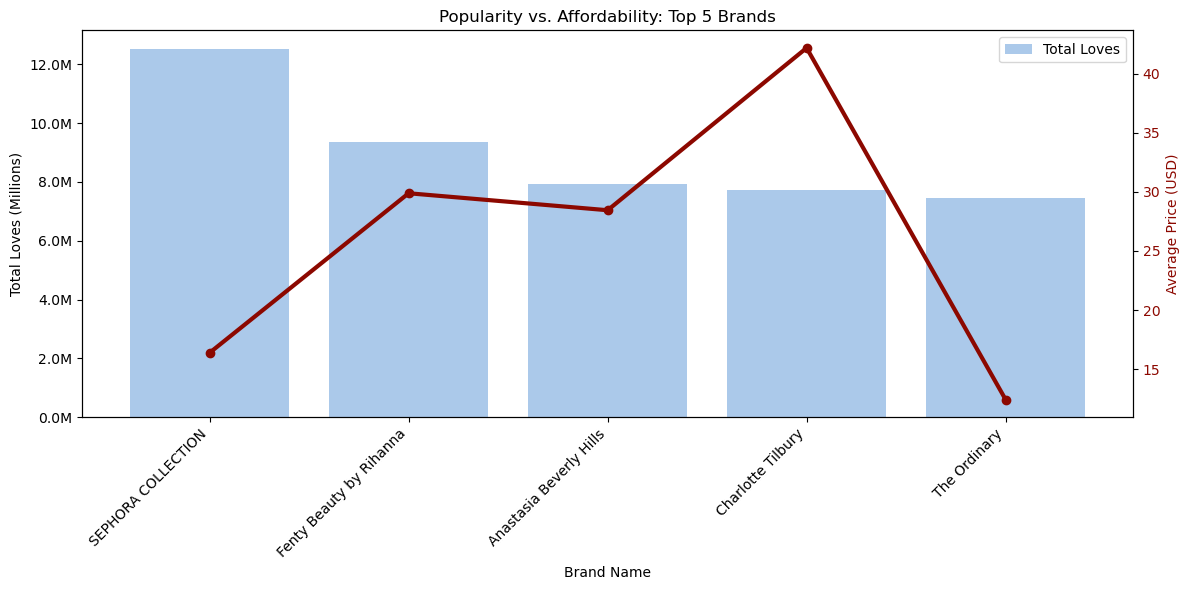

In [25]:
# Creating a bar chart for the top 5 brands 
fig, ax1 = plt.subplots(figsize = (12, 6))

# Axis 1: Plot Total Loves 
color = sns.color_palette("pastel")[0]
sns.barplot(x = 'brand_name', y = 'total_loves', data = q1_top5_brands, ax = ax1, color = color, label = 'Total Loves')
ax1.set_xlabel("Brand Name")
ax1.set_ylabel('Total Loves (Millions)', color = 'black')
ax1.tick_params(axis = 'y', labelcolor = 'black')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 45, ha = 'right')
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M'))
ax1.set_title('Popularity vs. Affordability: Top 5 Brands')

# Axis 2: Plot Average Price
ax2 = ax1.twinx()
color = sns.color_palette("dark")[3]
ax2.plot(q1_top5_brands['brand_name'], q1_top5_brands['avg_price'], color = color, marker = 'o', linewidth = 3, label = "Average Price (USD)")
ax2.set_ylabel('Average Price (USD)', color = color)
ax2.tick_params(axis = 'y', labelcolor = color)

fig.tight_layout()

**A: The most loved products tend to be from accessible, mid-range brands. Charlotte Tilbury has the highest average price of ~$42.16 among the top 5 popular brands, while the overall most popular brand, SEPHORA COLLECTION, and the 5th most popular, The Ordinary, are the most budget-friendly (averge prices around $16.39 and $12.43). This confirms the weak negative correlation found earlier in the EDA, suggesting that massive popularity is driven by affordability and value rather than luxury pricing.**

In [26]:
# 2. Which primary product categories are the most popular and the highest rated?

# First, need to drop NaNs for 'rating' and 'loves_count' before calculating category success
q2_df = df.dropna(subset = ['rating', 'loves_count']).copy()

q2_results = q2_df.groupby('primary_category').agg(
    mean_rating = ('rating', 'mean'), 
    total_loves = ('loves_count', 'sum')
).reset_index().sort_values(by = ['total_loves', 'mean_rating'], ascending = [False, False])

print("\nQ2: Primary Categories by Total Loves (Popularity) and Mean Rating")
print(q2_results)


Q2: Primary Categories by Total Loves (Popularity) and Mean Rating
  primary_category  mean_rating  total_loves
4           Makeup     4.146845    128417992
7         Skincare     4.228890     65558162
3             Hair     4.201113     20053018
1        Fragrance     4.230889     18210757
6        Mini Size     4.005665      7675089
0      Bath & Body     4.195015      6654329
8  Tools & Brushes     4.271458       777547
5              Men     4.504992       290443
2            Gifts     4.563450            0


/var/folders/z4/p92938l53w174k1_y1rdjn4w0000gn/T/ipykernel_43703/1885563840.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'primary_category', y = 'total_loves', data = q2_results, palette = 'viridis')


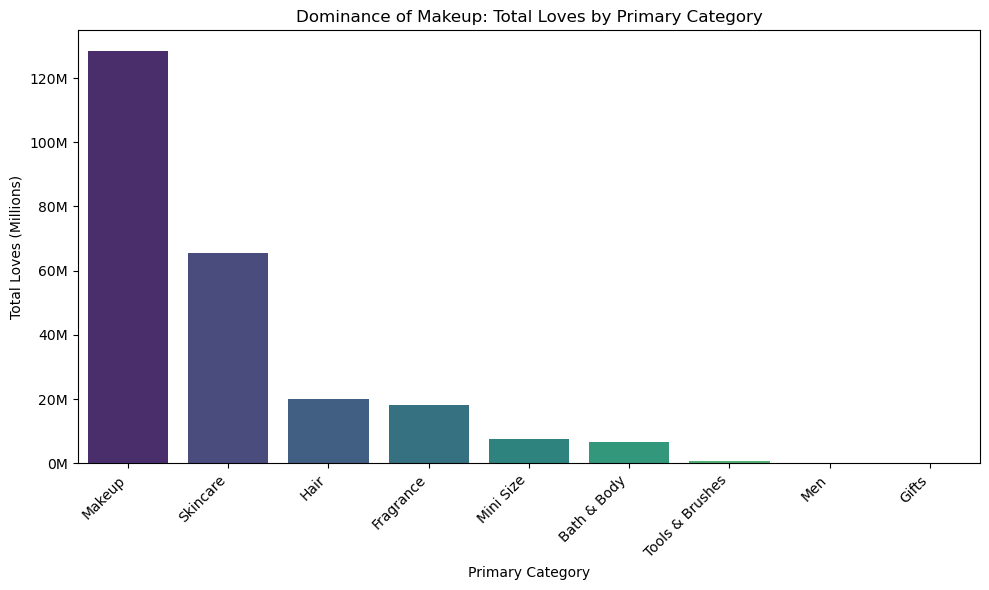

In [27]:
# Creating a bar chart of Total Loves by Primary Category

plt.figure(figsize = (10, 6))
sns.barplot(x = 'primary_category', y = 'total_loves', data = q2_results, palette = 'viridis')
plt.title('Dominance of Makeup: Total Loves by Primary Category')
plt.xlabel('Primary Category')
plt.ylabel('Total Loves (Millions)')
plt.xticks(rotation = 45, ha = 'right')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x/1e6:.0f}M'))
plt.tight_layout()


**A: Makeup is the dominant category by total popularity, boasting nearly double the loves of the next category which is skincare. However, smaller, lower-volume categories like Men and Tools & Brushes have the highest average ratings (around 4.50 and 4.27), which could indicate high customer satisfaction in niche areas.**

In [28]:
#3. Do Sephora Exclusive products have a higher average loves_count than non-exclusive products?

# Grouping sephora_exclusive and loves_count columns and calculating the loves_count mean
q3_results = df.groupby('sephora_exclusive')['loves_count'].mean().reset_index()
#q3_results
q3_results['sephora_exclusive'] = q3_results['sephora_exclusive'].map({0: 'Non-Exclusive', 1: 'Sephora Exclusive'})
q3_results.rename(columns = {'loves_count': 'mean_loves_count'}, inplace = True)

print("\nQ3: Mean Loves Count for Sephora Exclusive vs. Non-Exclusive Products")
print(q3_results)


Q3: Mean Loves Count for Sephora Exclusive vs. Non-Exclusive Products
   sephora_exclusive  mean_loves_count
0      Non-Exclusive      28488.348290
1  Sephora Exclusive      34365.866667


/var/folders/z4/p92938l53w174k1_y1rdjn4w0000gn/T/ipykernel_43703/3778707603.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x ='sephora_exclusive', y = 'mean_loves_count', data = q3_results, palette =['purple', 'pink'])


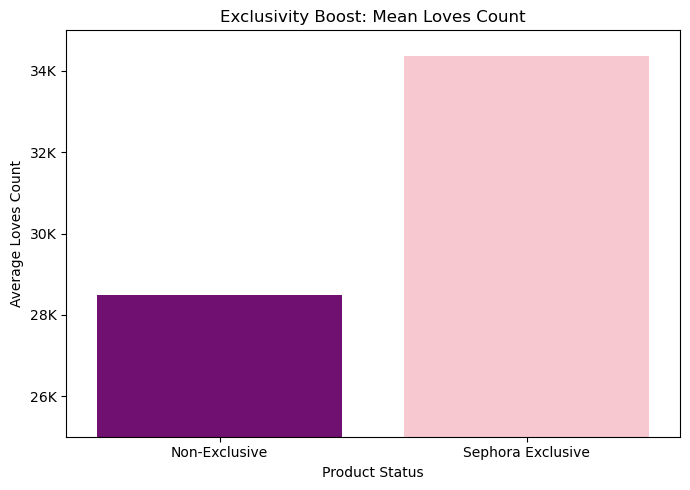

In [29]:
# Creating a bar chart to display the mean loves count

plt.figure(figsize = (7, 5))
sns.barplot(x ='sephora_exclusive', y = 'mean_loves_count', data = q3_results, palette =['purple', 'pink'])
plt.title('Exclusivity Boost: Mean Loves Count')
plt.xlabel('Product Status')
plt.ylabel('Average Loves Count')
plt.ylim(25000, 35000) # Setting limit to highlight difference
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x/1e3:.0f}K'))
plt.tight_layout()

**A: Yes, Sephora Exclusive products have a higher average loves_count (34,365) than non-exclusive products (28,488). This suggests that the exclusivity status, which often comes with marketing and better shelf placement, is associated with a moderate boost in product popularity.**

In [30]:
# 4. What is the average rating for products with very high review volume (top 10% of reviews)?

q4_df = df.dropna(subset = ['rating', 'reviews']).copy()
# Calculate 90th percentile for reviews
review_90th_percentile = q4_df['reviews'].quantile(0.90)

# Filter for high review volume products (top 10%)
q4_high_volume = q4_df[q4_df['reviews'] >= review_90th_percentile]

# Calculate mean rating for high volume vs. all products
mean_rating_high_volume = q4_high_volume['rating'].mean()
overall_mean_rating = q4_df['rating'].mean()

print(f"\nQ4: Overall Mean Rating: {overall_mean_rating:.4f}")
print(f"Q4: Mean Rating for Top 10% Products by Reviews ({review_90th_percentile:.0f}+ reviews): {mean_rating_high_volume:.4f}")



Q4: Overall Mean Rating: 4.1945
Q4: Mean Rating for Top 10% Products by Reviews (1097+ reviews): 4.2931


**A: Products with a very high review volume (top 10%) have a higher average rating (4.29) compared to the overall product base (4.19). While the linear correlation was weak (0.07), products that generate a massive amount of discussion are slightly more likely to be loved by the majority of reviewers.**

In [31]:
# 5. What percentage of online-only products are currently out-of-stock compared to products available in stores?
# 1 = Out of stock, 0 = In stock
# The mean of 'out_of_stock' will give the proportion of out-of-stock items

q5_results = df.groupby('online_only')['out_of_stock'].mean().reset_index()
q5_results['online_only'] = q5_results['online_only'].map({0: 'In-Store/Both', 1: 'Online Only'})
q5_results.rename(columns = {'out_of_stock': 'percent_out_of_stock'}, inplace = True)
q5_results['percent_out_of_stock'] = (q5_results['percent_out_of_stock'] * 100).round(2).astype(str) + '%'

print("\nQ5: Percentage of Out-of-Stock Products for Online-Only vs. In-Store/Both")
print(q5_results)


Q5: Percentage of Out-of-Stock Products for Online-Only vs. In-Store/Both
     online_only percent_out_of_stock
0  In-Store/Both                7.11%
1    Online Only                7.26%


**A: The percentage of products that are currently out-of-stock is virtually identical between Online Only products (7.26%) and products available in-store (7.11%). This suggests that product availability is managed consistently regardless of the distribution channel.**

##### Step 4.3 Discuss the outcome with stake holders. 

1. **Marketing & Pricing Strategy:** Affordability drives mass popularity. Our most loved brands (SEPHORA COLLECTION, The Ordinary) have the lowest average price. While premium brands (Charlotte Tilbury) can still be popular, massive engagement is linked to highly affordable products. We should ensure the best-selling budget items are never out of stock. 

2. **Merchandising Focus:** Makeup is the revenue and traffic king. This category dominated in popularity and should be the central focus for promotional activities. However, the high ratings in Tools & Brushes and Men suggest we should not neglect these high-satisfaction, niche categories as they may represent untapped growth opportunities for the company. 

3. **Exclusivity Value:** The "Sephora Exclusive" designation is effective. Exclusive products have a higher average loves_count. Continue to leverage this status with key brand partners to generate excitement and boost engagement. 

4. **Quality Assurance:** Products that generate a large volume of reviews (our "superstars") are generally high-quality (rating at around 4.29). This confirms that the most successful products are validated by the customer base, so we can confidently promote them. 

### Step 5: Summarize your inferences and write a conclusion


##### Step 5.1 Write a summary of what you’ve learned from the analysis

From the analysis, I learned that commercial success at Sephora is primarily driven by affordability and effective marketing, rather than average quality (rating). Specifically, the data shows that the most popular products are slightly less expensive (as shown by the weak negative correlation between price_usd and loves_count), with the top-performing brands being those with the lowest average prices (e.g., SEPHORA COLLECTION and The Ordinary). Quality, as measured by rating, was found to be largely independent of popularity, confirming that factors like brand visibility and the "Sephora Exclusive" designation are more critical to driving mass engagement with products. Furthermore, while Makeup is the overwhelmingly dominant category by volume, smaller categories like Tools & Brushes boast the highest customer satisfaction, pointing to different dynamics for commercial growth vs. product quality.

##### Step 5.3 Share ideas for future work 

1. I'd like dig deeper and do some further analysis on the different variations of products. I think there's enough data here to do so and answer some really good questions I had earlier in my project. I'd also like to look more into the categories sections for products at Sephora. 

2. Over the summer, I was in a program called AI_4ALL Ignite, as well as in my internship, where I learned to build machine learning models. I think that for this project, building a regression model to predict the loves_count using features beyond price and ratings such as: 
<br>
- Brand age/size
- Category (using one-hot encoding like we did in my AI4All project)
- Marketing flags (limited_edition, new, sephora_exclusive)
<br>
would be a great expansion of this project. Like with my AI4ALL project, I could possibly launch the model on StreamLit.


3. Lately, I've been learning a bit about Natural Language Processing and think that text analysis could be performed. I'd have to perform text mining on the ingredients and product_name columns to see if specific claims or ingredient types drive popularity or rating independent of brand. 


##### Step 5.4 Share the links to resources used

Kaggle Link to Dataset: https://www.kaggle.com/datasets/nadyinky/sephora-products-and-skincare-reviews?select=product_info.csv

Pandas Documentation reference my internship mentor had shared with me: https://pandas.pydata.org/docs/

NumPy Documentation: https://numpy.org/doc/

Seaborn: https://seaborn.pydata.org

I also used https://www.w3schools.com and my class notes.

